# Installation de la bib pymongo

In [3]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


# Remlissage de la base de données mongodb à partir des fichiers csv

### Connexion de la base de donnees Diseases

In [45]:
import csv
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['Diseases']

### Fonction de remplissage

In [46]:
def importer_csv_mongodb(fichier_csv, collection):
    try:
        with open(fichier_csv, 'r') as csvfile:
            csv_reader = csv.DictReader(csvfile)

            for row in csv_reader:
                collection.insert_one(row)
                
            print("Importation réussie.")
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")

### Remplissage de la collection Diseases

In [62]:
collection = db['Diseases']

fichier_csv = './dataset csv/dataset.csv'

importer_csv_mongodb(fichier_csv, collection)

Importation réussie.


### Remplissage de la collection Description 

In [63]:
collection = db['Description']

fichier_csv = './dataset csv/symptom_Description.csv'

importer_csv_mongodb(fichier_csv, collection)

Importation réussie.


### Remplissage de la collection Precaution

In [64]:
collection = db['Precaution']

fichier_csv = './dataset csv/symptom_Precaution.csv'

importer_csv_mongodb(fichier_csv, collection)

Importation réussie.


### Remplissage de la collection Severity

In [65]:
collection = db['Severity']

fichier_csv = './dataset csv/symptom_severity.csv'

importer_csv_mongodb(fichier_csv, collection)

Importation réussie.


### Fermer la connection avec la BDD

In [66]:
client.close()

In [67]:
client = MongoClient('localhost', 27017)
db = client['Diseases']

In [68]:
collection = db["Diseases"]
result = collection.count_documents({})
print(result)

4920


In [69]:
collection = db["Description"]
result = collection.count_documents({})
print(result)

41


In [70]:
collection = db["Precaution"]
result = collection.count_documents({})
print(result)

41


In [71]:
collection = db["Severity"]
result = collection.count_documents({})
print(result)

133


In [72]:
collection = db["Diseases"]
disease = collection.distinct("Disease")
result = len(disease)
print(result)

41


In [73]:
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
client = MongoClient('localhost', 27017)
db = client['Diseases']
collection_severity = db["Severity"]

cursor_severity = collection_severity.find({})
df_severity = pd.DataFrame(list(cursor_severity))

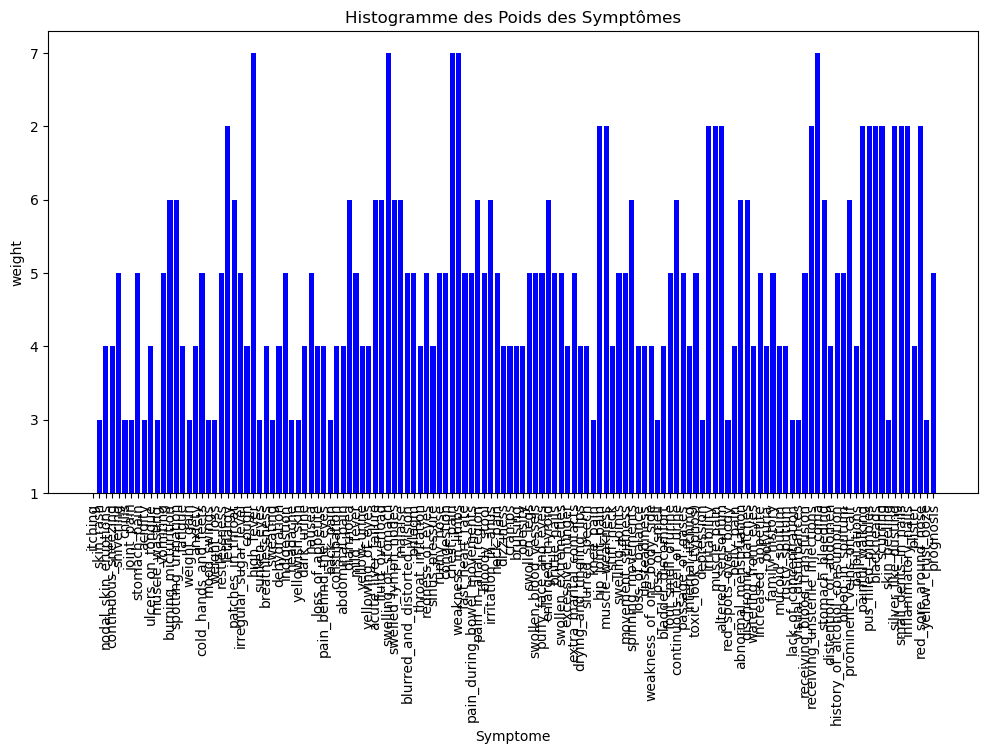

In [75]:
plt.figure(figsize=(12, 6))
plt.bar(df_severity['Symptom'], df_severity['weight'], color='blue')
plt.xlabel('Symptome')
plt.ylabel('weight')
plt.title('Histogramme des Poids des Symptômes')
plt.xticks(rotation=90)
plt.show()

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import os

### Loading the Dataset

In [77]:
from pymongo import MongoClient 

In [78]:
client = MongoClient('localhost', 27017)
db = client['Diseases']
collection = db['Diseases']

In [79]:
cursor = collection.find({}, {"_id": 0})
df = pd.DataFrame(list(cursor))

In [80]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


In [81]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920
unique,41,34,48,54,51,39,33,27,22,23,22,19,12,9,5,4,4,2
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,,,,,,,,,,,,,
freq,120,822,870,726,378,1206,1986,2652,2976,3228,3408,3726,4176,4416,4614,4680,4728,4848


In [82]:
df.replace('', np.nan, inplace=True)

In [83]:
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [84]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [85]:
cols = df.columns
data = df[cols].values.flatten()
s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)
df = pd.DataFrame(s, columns=df.columns)

In [86]:
df = df.fillna(0)

In [87]:
collection = db['Severity']
cursor = collection.find({}, {"_id": 0})
df1 = pd.DataFrame(list(cursor))

In [88]:
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [89]:
df1['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [90]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
(df[cols] == 0).all()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

In [93]:
df['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In [94]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [95]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [96]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 17) (738, 17) (4182,) (738,)


In [97]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [98]:
preds = model.predict(x_test)

F1-score% = 94.55525770244367 | Accuracy% = 94.579945799458


<Axes: >

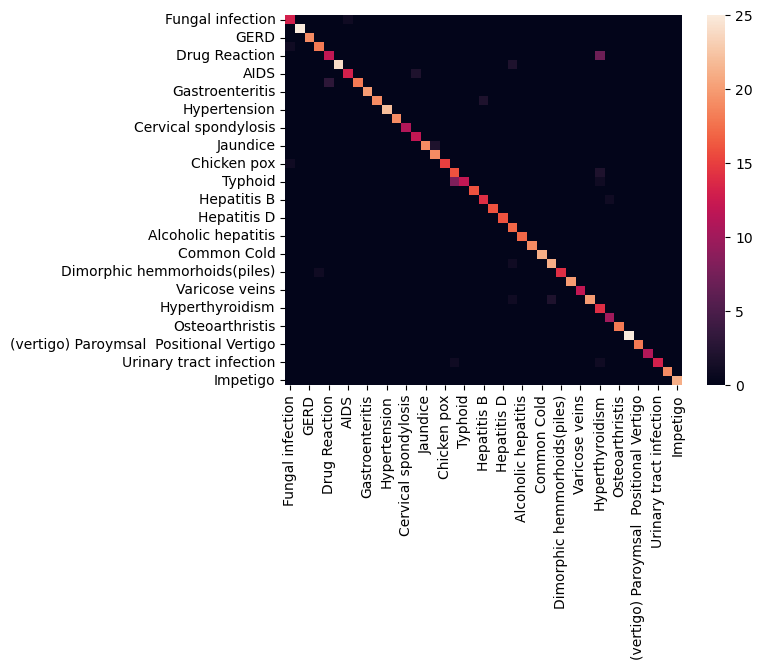

In [99]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [101]:
new_symptoms = [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

predicted_disease = model.predict([new_symptoms])

print("Maladie prédite :", predicted_disease[0])

Maladie prédite : Acne
